In [81]:
import NN
import os
import importlib
import glob
import pandas as pd
import numpy as np
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

In [88]:
importlib.reload(NN)

<module 'NN' from '/home/bouissob/Code/NN.py'>

In [84]:
#def __init__(self, Epoch = 2, Neur_seq = '32/64/64/32', Dataset_train = ['Ocean1'], Oc_mod_type = 'COM_NEMO-CNRS', 
#             Var_X = ['x', 'y', 'temperatureYZ', 'salinityYZ', 'iceDraft'], Var_Y = 'meltRate'):

In [17]:
#Test = NN.model_NN(Epoch = 1, Neur_seq = '4_2')
#Test.train()

In [19]:
Training = NN.Sequencial_training(NN.model_NN, Epoch = 14)
#Tot = Training.training(4, verbose = 0)

In [4]:
pwd = os.getcwd()
Ocean_mod = 'Ocean1'
Type = 'COM_NEMO-CNRS'
Models_path = os.path.join(pwd, 'Auto_model', Type, Ocean_mod)
li = glob.glob(Models_path + '/Ep_14*')

In [5]:
Test = li[len(li) - 1]
MeanX, StdX = pd.read_pickle(Test + '/MeanX.pkl'), pd.read_pickle(Test + '/StdX.pkl')
MeanY, StdY = np.loadtxt(Test + '/MeanY.csv'), np.loadtxt(Test + '/StdY.csv')
model = tf.keras.models.load_model(Test + '/model.h5')

In [8]:
model.count_params()

17089

/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1/Ep_14
Starting 1/18 model
Data variables used : x y temperatureYZ salinityYZ iceDraft
Starting 2/18 model
Data variables used : x y temperatureYZ salinityYZ iceDraft
Starting 3/18 model
Data variables used : x y temperatureYZ salinityYZ iceDraft
Starting 4/18 model
Data variables used : x y temperatureYZ salinityYZ iceDraft
Starting 5/18 model
Data variables used : x y temperatureYZ salinityYZ iceDraft
Starting 6/18 model
Data variables used : x y temperatureYZ salinityYZ iceDraft
Starting 7/18 model
Data variables used : x y temperatureYZ salinityYZ iceDraft
Starting 8/18 model
Data variables used : x y temperatureYZ salinityYZ iceDraft
Starting 9/18 model
Data variables used : x y temperatureYZ salinityYZ iceDraft
Starting 10/18 model
Data variables used : x y temperatureYZ salinityYZ iceDraft
Starting 11/18 model
Data variables used : x y temperatureYZ salinityYZ iceDraft
Starting 12/18 model
Data variables used : x y temperatureYZ

ValueError: x and y must be the same size

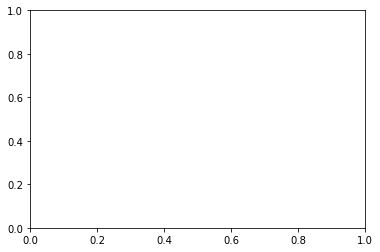

In [109]:
#def Plotting(Epoch = 14, Ocean_trained = 'Ocean1', Type_trained = 'COM_NEMO', 
             #Plotting_target = 'Ocean1', Type_tar = 'COM_NEMO-CNRS' ):
importlib.reload(NN)
Rn,NN.Plotting()

In [106]:
A = [2]
B = [3]
A, B = np.array(A), np.array(B) 

In [33]:
import re
re.findall('(\d+)\.(\d+)\.(\d+)', 'Version 1.15.6\n')

[('1', '15', '6')]

In [108]:
B

array([3])

In [65]:
Epoch, Neur, Choix = re.findall('Ep_(\d+)_N_(\w+)_Ch_(\d+)', Test)[0]

Ocean1
